In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels
import statsmodels.sandbox.stats.multicomp

%matplotlib inline

Сгенерируем данные с одинаковыми средними

In [2]:
data_fst = np.random.normal(10, 10, size=100)
data_snd = np.random.normal(10, 1, size=100)

Если мы посмотрим на средние значения выборок, то они конечно же будут различны

In [3]:
print data_fst.mean()
print data_snd.mean()

9.99671444985
10.0143296645


Но если средние разные, то чиселки тоже могут не сильно отличаться

In [4]:
data_fst = np.random.normal(10.5, 10, size=100)
data_snd = np.random.normal(10, 1, size=100)

print data_fst.mean()
print data_snd.mean()

11.3573755012
10.1034278906


### - И чего?
### - Эм, а как нам понимать, что в первом случае всё норм, а во втором выборки разные??

# ЦПТ

### - Можно воспользоваться ЦПТ и получить доверительный интервал на каждое значение?
### - Ну да, если выборки достаточно большие

In [5]:
print data_fst.mean(), data_fst.std() * 1.96 / np.sqrt(len(data_fst))
print data_snd.mean(), data_snd.std() * 1.96 / np.sqrt(len(data_snd))

11.3573755012 2.11345550804
10.1034278906 0.18424477085


### - Интервалы пересекаются, как быть? 
### - А давайте вычтем величины, посмотрим их распределение и возрадуемся!
### - okay

In [6]:
data_fst.mean() - data_snd.mean()

1.253947610563463

In [7]:
(data_fst.mean() - data_snd.mean()) / np.sqrt(1. * data_fst.std() ** 2 / len(data_fst) + 1. * data_snd.std() ** 2 / len(data_snd))

1.1585060610936069

# scipy tests

### - Это сдохнуть можно всё это запоминать
### - Знать формулы необязательно, но надо знать о их существовании и о других формулах и принципы их применения

Вот например в scipy есть куча различных тестов, в которых уже все формулы написаны и надо просто вызвать функцию

In [8]:
scipy.stats.ttest_ind(data_fst, data_snd)

Ttest_indResult(statistic=1.1526989766000135, pvalue=0.25042369783182827)

### - Эй, а в чём смысл pvalue?
### - Я не могу ответить правильно, но могу отвергнуть все неправильные ответы
### - Лол, а всё-таки, в чём?

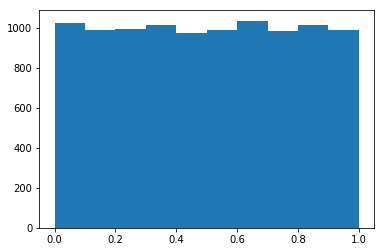

In [9]:
pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=100)
    data_snd = np.random.normal(10, 1, size=100)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
plt.hist(pvalues)
plt.show()

### - О круто, значит, если pvalue меньше 0.05, то я могу отвегнуть гипотезу и буду прав
### - Не совсем...

In [10]:
bad_pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=100)
    data_snd = np.random.normal(10, 1, size=100)
    bad_pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue < 0.05)
    
print np.mean(bad_pvalues)

0.0533


### - Ну ладно, иногда ошибаемся, терпимо, но значит если pvalue > 0.05, то можно принять гипотезу
### - Меня забавляет твой оптимизм

0.169


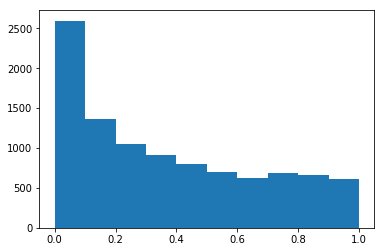

In [11]:
pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=100)
    data_snd = np.random.normal(10, 1, size=100)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
print (np.array(pvalues) < 0.05).mean()
plt.hist(pvalues)
plt.show()

0.51


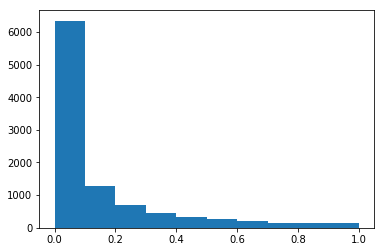

In [12]:
pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(12, 10, size=100)
    data_snd = np.random.normal(10, 1, size=100)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
print (np.array(pvalues) < 0.05).mean()
plt.hist(pvalues)
plt.show()

### - всё тлен :( статистика бесполезна
### - ну а чего ты хотел на 100 точках, ты как бы пытаешься отличить эффект от рандома, для этого надо чтобы они реально отличались, ты бы ещё по одной точке пытался определить

0.882


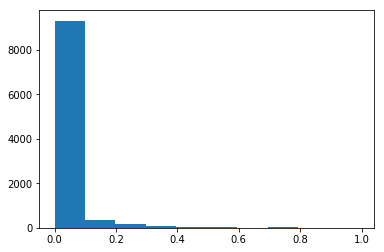

In [13]:
pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=1000)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
print (np.array(pvalues) < 0.05).mean()
plt.hist(pvalues)
plt.show()

### - О, у меня идея! А давайте проверять не только средние, а ещё и кубы, они же тоже должны совпадать. Мы так больше информации получим, и если есть эффект, то с большей вероятностью его найдём. Эй, что это?
### - Пистолет
### - Зачем ты мне его даёшь?
### - Ну, видимо, ты любишь стрелять себе в ноги...

0.0498
0.0443
0.0213
0.0728


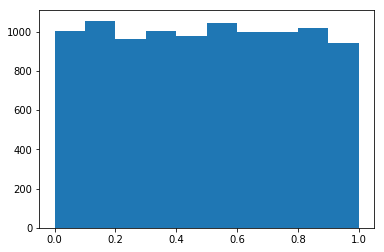

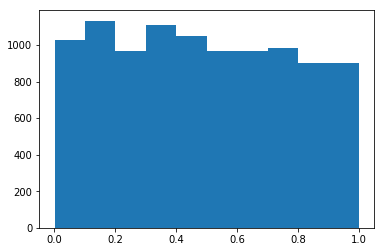

In [15]:
pvalues_original = []
pvalues_tripled = []
for _ in xrange(10000):
    data_fst = np.random.normal(0, 10, size=100)
    data_snd = np.random.normal(0, 1, size=100)
    pvalues_original.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    pvalues_tripled.append(scipy.stats.ttest_ind(data_fst ** 3, data_snd ** 3).pvalue)
    
print (np.array(pvalues_original) < 0.05).mean()
print (np.array(pvalues_tripled) < 0.05).mean()
print ((np.array(pvalues_original) < 0.05) & (np.array(pvalues_tripled) < 0.05)).mean()
print ((np.array(pvalues_original) < 0.05) | (np.array(pvalues_tripled) < 0.05)).mean()

plt.hist(pvalues_original)
plt.show()

plt.hist(pvalues_tripled)
plt.show()

### - Хрень какая-то, и что делать?
### - Множественное тестирование

In [16]:
statsmodels.sandbox.stats.multicomp.multipletests([0.05, 0.05])[1]

array([ 0.0975,  0.0975])

In [ ]:
pvalues_original = []
pvalues_tripled = []
corrected_pvalues_original = []
corrected_pvalues_tripled = []

for _ in xrange(10000):
    data_fst = np.random.normal(0, 10, size=100)
    data_snd = np.random.normal(0, 1, size=100)
    pvalue_fst = scipy.stats.ttest_ind(data_fst, data_snd).pvalue
    pvalue_snd = scipy.stats.ttest_ind(data_fst ** 3, data_snd ** 3).pvalue
    pvalues_original.append(pvalue_fst)
    pvalues_tripled.append(pvalue_snd)
    
    corrected_pvalue_fst, corrected_pvalue_snd = statsmodels.sandbox.stats.multicomp.multipletests(
        [pvalue_fst, pvalue_snd]
    )[1]
    
    corrected_pvalues_original.append(corrected_pvalue_fst)
    corrected_pvalues_tripled.append(corrected_pvalue_snd)
    
print (np.array(corrected_pvalues_original) < 0.05).mean()
print (np.array(pvalues_tripled) < 0.05).mean()
print ((np.array(corrected_pvalues_original) < 0.05) & (np.array(corrected_pvalues_tripled) < 0.05)).mean()
print ((np.array(corrected_pvalues_original) < 0.05) | (np.array(corrected_pvalues_tripled) < 0.05)).mean()

plt.hist(corrected_pvalues_original)
plt.show()

plt.hist(corrected_pvalues_tripled)
plt.show()

### - А если стандартные тесты не работают, не всегда же можно формулку посчитать. Например, если не среднее хочется, а сумму. Что на это скажешь?
### - Есть ещё парочка подходов

# Перестановочные тесты

In [ ]:
data_fst = np.random.normal(0, 10, size=100)
data_snd = np.random.normal(0, 1, size=100)

print scipy.stats.ttest_ind(data_fst, data_snd).pvalue

data = np.array(list(data_fst) + list(data_snd))
size = len(data)
values = []
for _ in xrange(10000):
    mask = (np.random.random(size=size) > 0.5)
    values.append(data[mask].mean() - data[~mask].mean())

plt.hist(values, bins=30)
plt.show()

print (np.abs(np.array(values)) > np.abs(data_fst.mean() - data_snd.mean())).mean()

In [ ]:
data_fst = np.random.normal(0, 10, size=100)
data_snd = np.random.normal(0, 1, size=100)

print scipy.stats.ttest_ind(data_fst, data_snd).pvalue

data = np.array(list(data_fst) + list(data_snd))
size = len(data)
values = []
for _ in xrange(10000):
    mask = (np.random.random(size=size) > 0.5)
    values.append(data[mask].mean() - data[~mask].mean())

plt.hist(values, bins=30)
plt.show()

print (np.abs(np.array(values)) > np.abs(data_fst.mean() - data_snd.mean())).mean()

# Bootstap

In [ ]:
data_fst = np.random.normal(0, 10, size=100)
data_snd = np.random.normal(0, 1, size=100)

print scipy.stats.ttest_ind(data_fst, data_snd).pvalue

values = []
for _ in xrange(10000):
    values.append(
        np.random.choice(data_fst, replace=True, size=len(data_fst)).mean()
        -
        np.random.choice(data_snd, replace=True, size=len(data_snd)).mean()
    )

plt.hist(values, bins=30)
plt.show()

print np.percentile(values, [2.5, 97.5])

In [ ]:
data_fst = np.random.normal(2, 10, size=100)
data_snd = np.random.normal(0, 1, size=100)

print scipy.stats.ttest_ind(data_fst, data_snd).pvalue

values = []
for _ in xrange(10000):
    values.append(
        np.random.choice(data_fst, replace=True, size=len(data_fst)).mean()
        -
        np.random.choice(data_snd, replace=True, size=len(data_snd)).mean()
    )

plt.hist(values, bins=30)
plt.show()

print np.percentile(values, [2.5, 97.5])

In [ ]:
data_fst = np.random.normal(2, 10, size=10000)
data_snd = np.random.normal(0, 1, size=10000)

print scipy.stats.ttest_ind(data_fst, data_snd).pvalue

values = []
for _ in xrange(10000):
    values.append(
        np.random.choice(data_fst, replace=True, size=len(data_fst)).mean()
        -
        np.random.choice(data_snd, replace=True, size=len(data_snd)).mean()
    )

plt.hist(values, bins=30)
plt.show()

print np.percentile(values, [2.5, 97.5])